In [2]:
import numpy as np
import matplotlib.pyplot as plt
import particle.literals
plt.rcParams['text.usetex'] = True
import pandas as pd

# SU(2) scenario

## Invisible searches

In [3]:
hbarc = 6.582119569e-13*3e-4 # GeV m
fa = 1000
a_em = 1/137

mB = particle.literals.B_plus.mass/1000
mD = particle.literals.D_plus.mass/1000
mDs = particle.literals.Dst_2010_plus.mass/1000
mK = particle.literals.K_plus.mass/1000
mpi = particle.literals.pi_plus.mass/1000
m_meson = {'B': mB, 'D': mD, 'Ds': mDs, 'K': mK, 'pi': mpi}

me = particle.literals.e_minus.mass/1000
mmu = particle.literals.mu_minus.mass/1000
mtau = particle.literals.tau_minus.mass/1000
m_lep = {'e': me, 'mu': mmu, 'tau': mtau}

#(SM, exp, err_exp)
exp_lims = {('B', 'e'): (8.37e-12, 0, 9.8e-7),
            ('B', 'mu'): np.array((3.57, 5.3, (2**2+0.9**2)**0.5))*1e-7,
            ('B', 'tau'): np.array((7.95, 7.2, (2.7**2+1.1**2)**0.5))*1e-5,
            ('D', 'e'): (9.51e-9, 0, 8.8e-6),
            ('D', 'mu'): np.array((4.04, 3.71, (0.19**2+0.06**2)**0.5))*1e-4,
            ('D', 'tau'): np.array((1.08, 1.2, (0.24**2+0.12**2)**0.5))*1e-3,
            ('Ds', 'e'): (1.24e-7, 0, 8.3e-5),
            ('Ds', 'mu'): np.array((5.28, 5.49, 0.17))*1e-3,
            ('Ds', 'tau'): np.array((5.15, 4.83, (0.65**2+0.26**2)**0.5))*1e-2,
            ('K', 'e'): np.array((1.62, 1.582, 0.007))*1e-5,
            ('K', 'mu'): (0.629, 0.6356, 0.0011),
            ('pi', 'e'): (1.2352, 1.2344, (0.0023**2+0.0019**2)**0.5), #1506.05845
            #('pi', 'mu'): (1, 0.999877, 4e-7)
            }

(0.001, 5.27934)

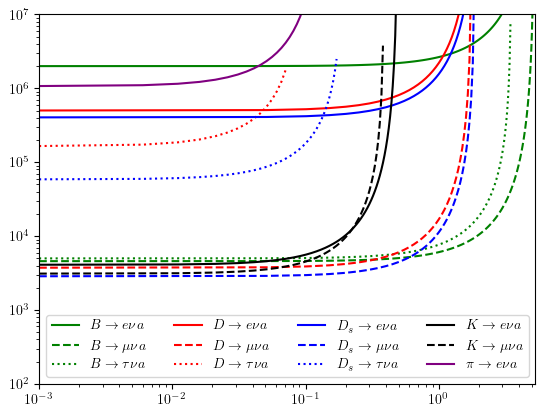

In [4]:
c = {'B': 'g', 'Ds': 'b', 'D': 'r', 'K': 'k', 'pi': 'purple'}
ls = {'e': 'solid', 'mu':'dashed', 'tau':'dotted'}
tex = {'B': 'B', 'Ds': r'D_s', 'D': 'D', 'K': 'K', 'e':'e', 'mu': r'\mu', 'tau':r'\tau', 'pi': r'\pi'}

for decay in exp_lims.keys():
    meson = decay[0]
    lep = decay[1]
    df = pd.read_csv(f'gl{meson.capitalize()}to{lep.capitalize()}.dat', sep='\t', names=['ma', 'BR'])
    plt.loglog(df['ma'], np.sqrt(exp_lims[decay][2]/df['BR']), lw=1.5, c=c[meson], ls=ls[lep], label= '$' + tex[meson] + r' \to ' + tex[lep] + r'\nu a$')
plt.legend(ncols=4)
plt.ylim(1e2, 1e7)
plt.xlim(1e-3, mB)
#plt.ylim([1e2, 1e7])

In [5]:
def tau_alp(ma, cll):
    if ma > 2*mtau:
        ml = mtau
    elif ma > 2*mmu:
        ml = mmu
    else:
        ml = me
    return 8*np.pi*fa**2*hbarc/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))

In [6]:
def tau_photon(ma: float):
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    gamma = a_em**2*ma**3/(fa**2*(4*np.pi)**3)*abs(B1(4*mtau**2/ma**2))**2
    return hbarc/gamma

/tmp/ipykernel_15291/61435413.py:7: RuntimeWarning: invalid value encountered in sqrt
  bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
/tmp/ipykernel_15291/267506272.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 8*np.pi*fa**2*hbarc/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


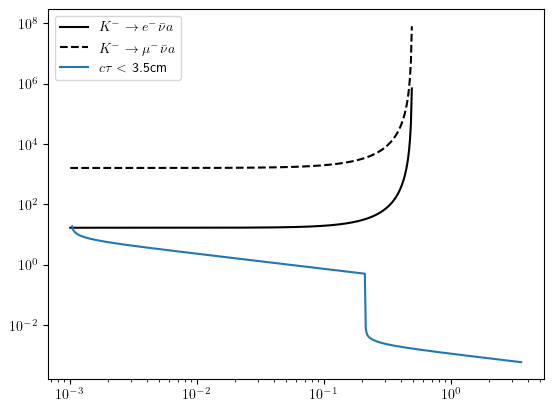

In [7]:
for meson in ['K']:
    if meson == 'K':
        leplist = ['e', 'mu']
    else:
        leplist = ['e', 'mu', 'tau']
    for lep in leplist:
        bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
        plt.loglog(ma_list, bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a$', c=c[meson], ls=ls[lep])
plt.loglog(ma_list, [np.sqrt(tau_alp(m, 1)/0.35) for m in ma_list], label=r'$c\tau < $ 3.5cm')
plt.legend()
#plt.ylim([1e2, 1e7])

/tmp/ipykernel_15291/267506272.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 8*np.pi*fa**2*hbarc/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


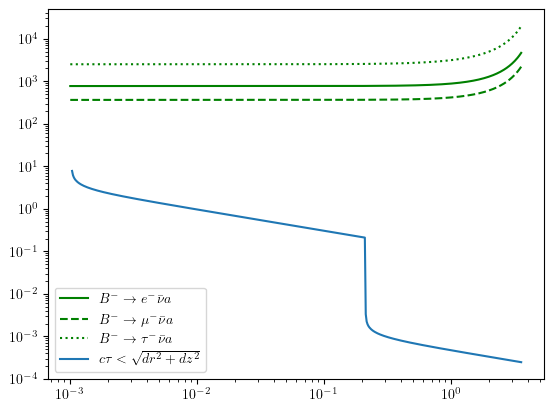

In [8]:
for meson in ['B']:
    if meson == 'K':
        leplist = ['e', 'mu']
    else:
        leplist = ['e', 'mu', 'tau']
    for lep in leplist:
        bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
        plt.loglog(ma_list, bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a$', c=c[meson], ls=ls[lep])
plt.loglog(ma_list, [np.sqrt(tau_alp(m, 1)/(0.5**2+2**2)**0.5) for m in ma_list], label=r'$c\tau < \sqrt{dr^2+dz^2}$')
plt.legend()
#plt.ylim([1e2, 1e7])

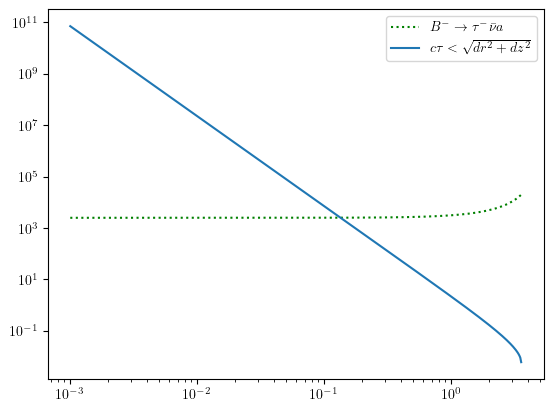

In [9]:
for meson in ['B']:
    if meson == 'K':
        leplist = ['e', 'mu']
    else:
        leplist = ['tau']
    for lep in leplist:
        bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
        plt.loglog(ma_list, bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a$', c=c[meson], ls=ls[lep])
plt.loglog(ma_list, [np.sqrt(tau_photon(m)/(0.5**2+2**2)**0.5) for m in ma_list], label=r'$c\tau < \sqrt{dr^2+dz^2}$')
plt.legend()
#plt.ylim([1e2, 1e7])

/tmp/ipykernel_15291/181524070.py:7: RuntimeWarning: invalid value encountered in sqrt
  bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
/tmp/ipykernel_15291/267506272.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 8*np.pi*fa**2*hbarc/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


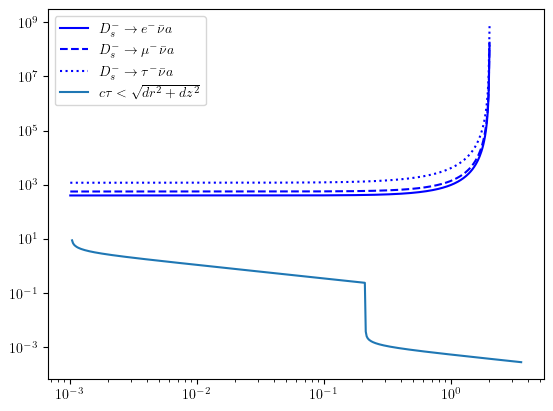

In [10]:
for meson in ['Ds']:
    if meson == 'K':
        leplist = ['e', 'mu']
    else:
        leplist = ['e', 'mu', 'tau']
    for lep in leplist:
        bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
        plt.loglog(ma_list, bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a$', c=c[meson], ls=ls[lep])
plt.loglog(ma_list, [np.sqrt(tau_alp(m, 1)/(1.5**2+0.5**2)**0.5) for m in ma_list], label=r'$c\tau < \sqrt{dr^2+dz^2}$')
plt.legend()

/tmp/ipykernel_15291/1041020369.py:7: RuntimeWarning: invalid value encountered in sqrt
  bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]


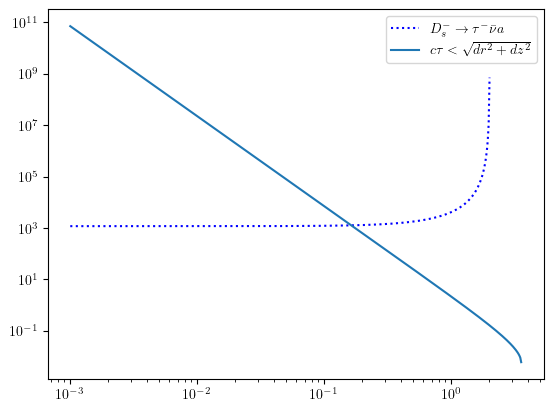

In [11]:
for meson in ['Ds']:
    if meson == 'K':
        leplist = ['e', 'mu']
    else:
        leplist = ['tau']
    for lep in leplist:
        bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
        plt.loglog(ma_list, bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a$', c=c[meson], ls=ls[lep])
plt.loglog(ma_list, [np.sqrt(tau_photon(m)/(0.5**2+2**2)**0.5) for m in ma_list], label=r'$c\tau < \sqrt{dr^2+dz^2}$')
plt.legend()

/tmp/ipykernel_15291/2638782560.py:7: RuntimeWarning: invalid value encountered in sqrt
  bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
/tmp/ipykernel_15291/267506272.py:8: RuntimeWarning: invalid value encountered in sqrt
  return 8*np.pi*fa**2*hbarc/(ma*ml**2*cll**2*np.sqrt(1-4*ml**2/ma**2))


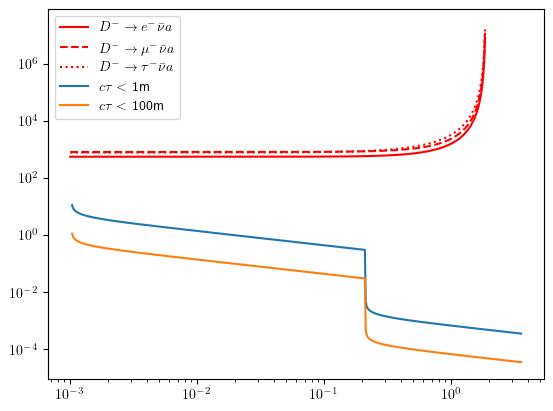

In [12]:
for meson in ['D']:
    if meson == 'K':
        leplist = ['e', 'mu']
    else:
        leplist = ['e', 'mu', 'tau']
    for lep in leplist:
        bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
        plt.loglog(ma_list, bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a$', c=c[meson], ls=ls[lep])
#plt.loglog(ma_list, [np.sqrt(tau_alp(m, 1)/(1.5**2+0.5**2)**0.5) for m in ma_list], label=r'$c\tau < \sqrt{dr^2+dz^2}$')
plt.loglog(ma_list, [np.sqrt(tau_alp(m, 1)/1) for m in ma_list], label=r'$c\tau <$ 1m')
plt.loglog(ma_list, [np.sqrt(tau_alp(m, 1)/100) for m in ma_list], label=r'$c\tau <$ 100m')
plt.legend()
plt.savefig('Dmeson.png')

/tmp/ipykernel_15291/1503212462.py:7: RuntimeWarning: invalid value encountered in sqrt
  bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]


(100.0, 10000.0)

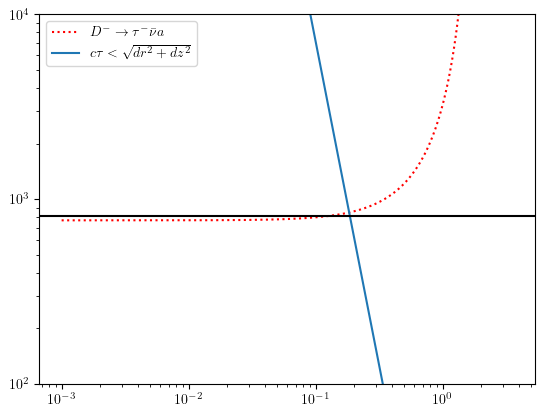

In [13]:
for meson in ['D']:
    if meson == 'K':
        leplist = ['e', 'mu']
    else:
        leplist = ['tau']
    for lep in leplist:
        bound = [np.sqrt((exp_lims[(meson, lep)][2]/exp_lims[(meson, lep)][0])/BR_ratio(m_meson[meson], m_lep[lep], 10**x)) for x in np.linspace(-3, np.log10(2*mtau), 500)]
        plt.loglog(ma_list, bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a$', c=c[meson], ls=ls[lep])
plt.loglog(ma_list, [np.sqrt(tau_photon(m)/(0.5**2+2**2)**0.5) for m in ma_list], label=r'$c\tau < \sqrt{dr^2+dz^2}$')
plt.legend()
plt.axhline(814, c='k')
plt.ylim([1e2, 1e4])

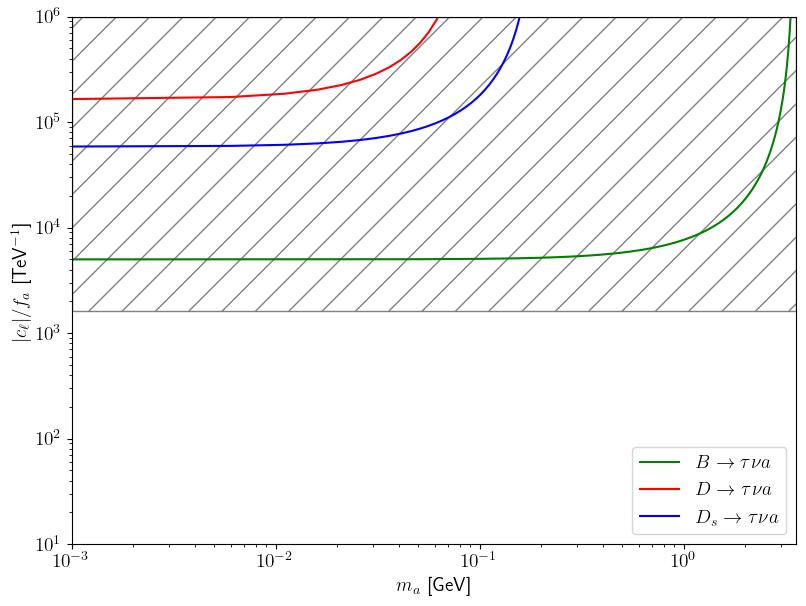

In [20]:
plt.figure(figsize=[8,6])
for decay in exp_lims.keys():
    meson = decay[0]
    lep = decay[1]
    if lep == 'tau':
        df = pd.read_csv(f'gl{meson.capitalize()}to{lep.capitalize()}.dat', sep='\t', names=['ma', 'BR'])
        plt.loglog(df['ma'], np.sqrt(exp_lims[decay][2]/df['BR']), lw=1.5, c=c[meson], label= '$' + tex[meson] + r' \to ' + tex[lep] + r'\nu a$')

plt.fill_between([1e-3, 2*mtau], [2*814, 2*814], [1e6, 1e6], color='none', edgecolor='gray', hatch='/')
plt.ylim([10, 1e6])
plt.xlim([1e-3, 2*mtau])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel(r'$m_a$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\ell|/f_a$ [TeV$^{-1}$]', fontsize=14)
plt.tight_layout(pad=0.5)
plt.savefig('meson_lept_invisible.pdf')

In [27]:
for decay in exp_lims.keys():
    meson = decay[0]
    lep = decay[1]
    if lep == 'tau':
        df = pd.read_csv(f'gl{meson.capitalize()}to{lep.capitalize()}.dat', sep='\t', names=['ma', 'BR'])
        bound = np.sqrt(exp_lims[decay][2]/df['BR'])
        pd.DataFrame({'ma_GeV': df['ma'], 'cl': bound}).to_csv(f'../data/meson_lept/{meson}{lep}inv_su2.csv', index=False)


## Visible searches

In [10]:
def BR_ee(ma):
    if ma < 2*mmu:
        return 1
    else:
        return me**2/mmu**2*((ma**2-4*me**2)/(ma**2-4*mmu**2))**0.5

def BR_mumu(ma):
    if ma < 2*mmu:
        return 0
    else:
        return 1-me**2/mmu**2*((ma**2-4*me**2)/(ma**2-4*mmu**2))**0.5

/tmp/ipykernel_10739/1453447180.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
/tmp/ipykernel_10739/1453447180.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
/tmp/ipykernel_10739/1453447180.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]


(1, 10000.0)

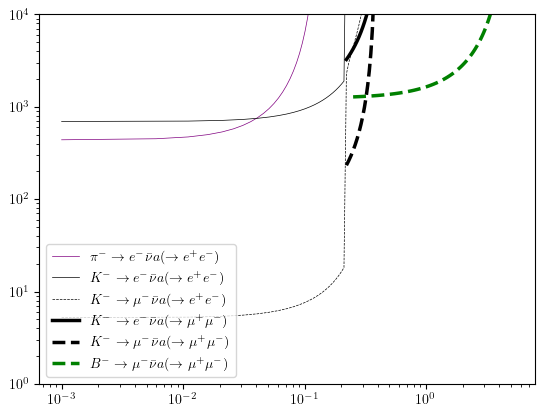

In [11]:
exp_lim_vis = {
    ('pi', 'e', 'ee'): (1.2352e-4, 3.2e-9, 0.5e-9),
    ('K', 'e', 'ee'): (1.62e-5, 2.48e-8, 0.2e-8),
    ('K', 'mu', 'ee'): (0.629, 7.06e-8, 0.31e-8),
    ('K', 'e', 'mumu'): (1.62e-5, 1.7e-8, 0.5e-8),
    ('K', 'mu', 'mumu'): (0.629, 0, 4.1e-7),
    ('B', 'mu', 'mumu'): (3.57e-7, 0, 1.6e-8)
}
lw = {'ee': 0.5, 'mumu': 2.5}

tex['ee'] = r'e^+e^-'
tex['mumu'] = r'\mu^+\mu^-'

for decay, val in exp_lim_vis.items():
    meson = decay[0]
    lep = decay[1]
    product = decay[2]
    if product == 'ee':
        br = BR_ee
    else:
        br = BR_mumu
    df = pd.read_csv(f'gl{meson.capitalize()}to{lep.capitalize()}.dat', sep='\t', names=['ma', 'BR'])
    bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
    plt.loglog(df['ma'], bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a(\to ' + tex[product]+ ')$', c=c[meson], ls=ls[lep], lw=lw[product])
plt.legend()
plt.ylim(1, 1e4)

In [41]:
for decay, val in exp_lim_vis.items():
    meson = decay[0]
    lep = decay[1]
    product = decay[2]
    if product == 'ee':
        br = BR_ee
    else:
        br = BR_mumu
    df = pd.read_csv(f'gl{meson.capitalize()}to{lep.capitalize()}.dat', sep='\t', names=['ma', 'BR'])
    bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
    pd.DataFrame({'ma_GeV': df['ma'], 'cl': bound}).to_csv(f'../data/meson_lept/{meson}_{lep}_{product}.csv', index=False)

/tmp/ipykernel_10739/3869664248.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
/tmp/ipykernel_10739/3869664248.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
/tmp/ipykernel_10739/3869664248.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]


In [22]:
def Gamma_phi(mphi: float) -> list[float]:
    Lambda = 1000
    def f(x):
        if x >= 1:
            return np.arcsin(x**-0.5)
        else:
            return np.pi/2+0.5j*np.log((1+(1-x)**0.5)/(1-(1-x)**0.5))
    B1 = lambda x: 1-x*f(x)**2
    res = [a_em**2*mphi**3/(Lambda**2*(4*np.pi)**3)*abs(B1(4*mtau**2/mphi**2)+B1(4*me**2/mphi**2)+B1(4*mmu**2/mphi**2))**2, 0, 0]
    #res = [4*np.pi*a_em**2/Lambda**2*mphi**3*abs(B1(4*mtau**2/mphi**2)+0*B1(4*mmu**2/mphi**2)+0*B1(4*me**2/mphi**2))**2/(16*np.pi)**2, 0, 0, 0]
    if mphi > 2*me:
        res[1] = mphi * me**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*me**2/mphi**2)
    if mphi > 2*mmu:
        res[2] = mphi * mmu**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mmu**2/mphi**2)
    if mphi > 2*mtau:
        res[3] = mphi * mtau**2/(8*np.pi*Lambda**2)*np.sqrt(1-4*mtau**2/mphi**2)
    return res

In [23]:
hbar/sum((np.array(Gamma_phi(1e-2))*(1)**2))

NameError: name 'hbar' is not defined

In [ ]:
hbar = 6.582119569e-13 # GeV ps

In [ ]:
data = []
for c in [10**x for x in np.linspace(-1, 5, 100)]:
    for m in [10**x for x in np.linspace(-3, -1, 100)]:
        tau = hbar/sum((np.array(Gamma_phi(m))*c**2))
        if tau > 0.1 and tau < 1000:
            br = BR_ratio(mpi, me, m)*c**2*1.2354e-4
            if br > 3e-11 and br < 3e-9:
                data.append({'m': m, 'tau': tau, 'br': np.log10(br)})

In [ ]:
for d in data:
    plt.scatter(d['tau'], d['m'], c=d['br'], s=1, vmin=np.log10(3e-11), vmax=np.log10(3e-9), cmap='jet_r')

plt.colorbar()

In [ ]:
[d['br'] for d in data]

In [ ]:
np.log10(3e-11)

# EW violating scenario

## Invisible searches

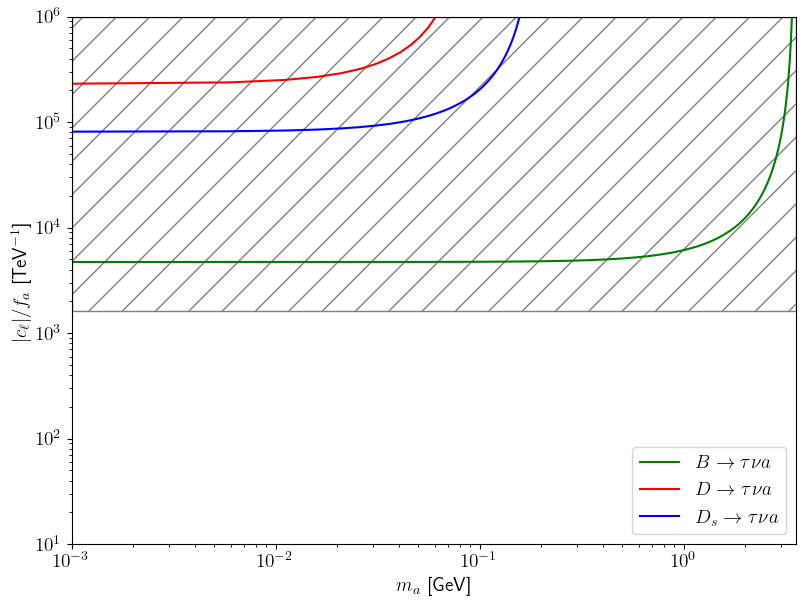

In [28]:
plt.figure(figsize=[8,6])
for decay in exp_lims.keys():
    meson = decay[0]
    lep = decay[1]
    if lep == 'tau':
        df = pd.read_csv(f'EWVgl{meson.capitalize()}to{lep.capitalize()}.dat', sep='\t', names=['ma', 'BR'])
        plt.loglog(df['ma'], np.sqrt(exp_lims[decay][2]/df['BR']), lw=1.5, c=c[meson], label= '$' + tex[meson] + r' \to ' + tex[lep] + r'\nu a$')

plt.fill_between([1e-3, 2*mtau], [2*814, 2*814], [1e6, 1e6], color='none', edgecolor='gray', hatch='/')
plt.ylim([10, 1e6])
plt.xlim([1e-3, 2*mtau])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc='lower right')
plt.xlabel(r'$m_a$ [GeV]', fontsize=14)
plt.ylabel(r'$|c_\ell|/f_a$ [TeV$^{-1}$]', fontsize=14)
plt.tight_layout(pad=0.5)
plt.savefig('meson_lept_invisible_ewv.pdf')

In [8]:
mD/(4*mtau)

0.263056740542305

/tmp/ipykernel_10739/1603839962.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
/tmp/ipykernel_10739/1603839962.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
/tmp/ipykernel_10739/1603839962.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]


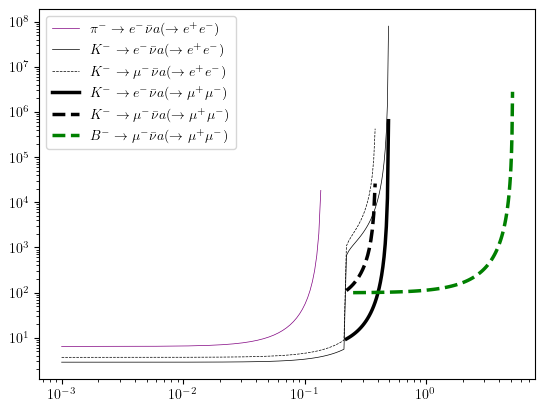

In [34]:
exp_lim_vis = {
    ('pi', 'e', 'ee'): (1.2352e-4, 3.2e-9, 0.5e-9),
    ('K', 'e', 'ee'): (1.62e-5, 2.48e-8, 0.2e-8),
    ('K', 'mu', 'ee'): (0.629, 7.06e-8, 0.31e-8),
    ('K', 'e', 'mumu'): (1.62e-5, 1.7e-8, 0.5e-8),
    ('K', 'mu', 'mumu'): (0.629, 0, 4.1e-7),
    ('B', 'mu', 'mumu'): (3.57e-7, 0, 1.6e-8)
}
lw = {'ee': 0.5, 'mumu': 2.5}

tex['ee'] = r'e^+e^-'
tex['mumu'] = r'\mu^+\mu^-'

for decay, val in exp_lim_vis.items():
    meson = decay[0]
    lep = decay[1]
    product = decay[2]
    if product == 'ee':
        br = BR_ee
    else:
        br = BR_mumu
    df = pd.read_csv(f'EWVgl{meson.capitalize()}to{lep.capitalize()}.dat', sep='\t', names=['ma', 'BR'])
    bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
    plt.loglog(df['ma'], bound, label='$' + tex[meson] + r'^- \to ' + tex[lep] + r'^- \bar{\nu} a(\to ' + tex[product]+ ')$', c=c[meson], ls=ls[lep], lw=lw[product])
plt.legend()
#plt.ylim(1, 1e4)

In [37]:
mB/(4*mtau)

0.7427906531747015

In [38]:
mD/(4*mtau)

0.263056740542305

In [39]:
mDs/(4*mtau)

0.2828388280449783

In [43]:
mK/(4*mmu)

1.168097175599676

In [44]:
mK/(4*me)

241.5254473614868

In [42]:
for decay, val in exp_lim_vis.items():
    meson = decay[0]
    lep = decay[1]
    product = decay[2]
    if product == 'ee':
        br = BR_ee
    else:
        br = BR_mumu
    df = pd.read_csv(f'EWVgl{meson.capitalize()}to{lep.capitalize()}.dat', sep='\t', names=['ma', 'BR'])
    bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
    pd.DataFrame({'ma_GeV': df['ma'], 'cl': bound}).to_csv(f'../data/meson_lept/{meson}_{lep}_{product}_ewv.csv', index=False)

/tmp/ipykernel_10739/3167732820.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
/tmp/ipykernel_10739/3167732820.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
/tmp/ipykernel_10739/3167732820.py:10: RuntimeWarning: divide by zero encountered in scalar divide
  bound = [np.sqrt(exp_lim_vis[decay][2]/(df['BR'][i]*br(df['ma'][i]))) for i in df.index]
